In [1]:
from tqdm import tqdm_notebook as tqdm
import numpy as np
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.preprocessing import normalize
import scipy
from pprint import pprint
import io
from collections import Counter

import numpy as np
import scipy.io
import sklearn.model_selection
import sklearn.tree
from numpy import genfromtxt
from scipy import stats
from sklearn.base import BaseEstimator, ClassifierMixin
import pandas as pd

import pydot
from decision_tree_starter import *
from tqdm import tqdm_notebook as tqdm
import matplotlib.pyplot as plt
%matplotlib inline


# Problem 1

### Collaborators



### Honor Code
“I certify that all solutions in this document are entirely my own and that I have not looked at anyone else’s
solution. I have given credit to all external sources I consulted.”

Aryan Luthra

In [2]:
%%latex

\newpage

<IPython.core.display.Latex object>

# Problem 2

## Part a
$$E[avg{[Y_i]}_{i=1}^n] = \frac1n \sum_{i=1}^n E[Y_i] = \frac1n \sum_{i=1}^n \mu = \mu$$

$$Var[avg{[Y_i]}_{i=1}^n] = Var(\frac1n \sum_{i=1}^n Y_i) = \frac1{n^2} Var(\sum_{i=1}^n Y_i) = \frac1{n^2}\sum_{i=1}^n \sigma^2  = \frac1n \sigma^2 $$


Therefore this method reduces variance of the model

## Part b

### Subpart a

Let $A$ be the number of elements contained in the final bag and $B$ be the number of elements of out of bag sample. Obviously, we have that $$ A = n - B $$

Next we know that $B$ can be written as a sum of Indicators, where $I_i$ is the indicator of that item $i$ is in NOT in the bag.

$$B = \sum_{i=0}^{n} I_i $$
$$ \therefore E(B) = \sum_{i=0}^{n} E(I_i) = \sum_{i=0}^{n} P(i \text{ is out of the bag}) = \sum_{i=0}^{n} (\frac{n-1}{n})^n $$

Using the exponential approximation, we have that

$$ \lim_{n\rightarrow \infty} (1 -\frac1n)^n \sim \frac1e$$
$$ \therefore E(B) =  \sum_{i=0}^{n} (\frac{n-1}{n})^n \sim \frac{n}{e}$$
$$ \therefore E(A) = n - E(B) \sim n(1-\frac1e) \approx 0.623n $$

### Subpart b 

## Part c

$$Var[avg{[Z_i]}_{i=1}^n] = Var(\frac1n \sum_{i=1}^n Z_i) = \frac1{n^2} Var(\sum_{i=1}^n Z_i) $$

$$ \rightarrow Var(\sum_{i=1}^n Z_i) = \sum_{i=1}^n Var(Z_i) + \sum_{i=1}^n \sum_{j=i+1}^n 2Cov(Z_i, Z_j)  = n\sigma^2 + 2\binom{n}{2} \rho$$

$$ \therefore Var[avg{[Z_i]}_{i=1}^n] =  \frac{\sigma^2}n + \frac{n-1}{n} \rho \leq \frac{\sigma^2}n + \frac{n-1}{n} \sigma^2 = \sigma^2$$ 

$$ \therefore Var[avg{[Z_i]}_{i=1}^n] \leq \sigma^2 $$ and equality only holds when  $ \forall_{i, j}  Cov(Z_i, Z_j) = 1 $ aka when $ \rho = 1 $


## Part d

There is a possibility given certain datasets that 2 features need to be known simeltaneously for an accurate prediction to be made. In this case a stump will not be a good idea, and averaging may not fix this.

# Problem 3

## Part 3.1, 3.2

See the decision_tree_starter.py

In [3]:
f = open("decision_tree_starter.py", "r")
lines = f.read()
print(lines)

# You may want to install "gprof2dot"
import io
from collections import Counter

import numpy as np
import scipy.io
import sklearn.model_selection
import sklearn.tree
from numpy import genfromtxt
from scipy import stats
from sklearn.utils import resample
from sklearn.base import BaseEstimator, ClassifierMixin
from tqdm import tqdm
from tqdm import tqdm_notebook

import pydot_ng as pydot
import os

os.environ["PATH"] += os.pathsep + r'C:\Program Files (x86)\Graphviz2.38\bin'

eps = 1e-5  # a small number


class DecisionTree:
    def __init__(self, max_depth=3, feature_labels=None):
        self.max_depth = max_depth
        self.features = feature_labels
        self.left, self.right = None, None  # for non-leaf nodes
        self.split_idx, self.thresh = None, None  # for non-leaf nodes
        self.data, self.pred = None, None  # for leaf nodes

    def str_root(self):
        if self.split_idx:
            if self.features:
                feat_name = str(self.features[self.split_id

## Part 3.3

1. Used one hot encoding of the categories to make them quantitative
2. Either max_depth is reached, we are at a pure leaf, or the best split provides no additional entropy gain. 
3. Created a bagged_trees object that implements bagged trees over the dataset it is passed in. Then i created a bunch of bagged tree classifiers for each subset of features
4. I made sure everything was done in numpy in order to spead up training
5. No, I tried to parallelize the fitting and predicting of each tree in order to increase model training and prediction spead. But failed to do so as ray is extremely hard to work with on a windows PC.

## Part 3.4

In [4]:
# Load titanic data
dataset = "titanic"
params = {
    "max_depth": 5,
    # "random_state": 6,
    "min_samples_leaf": 10,
}
N = 100
path_train = 'titanic_training.csv'
data = genfromtxt(path_train, delimiter=',', dtype=None)
path_test = 'titanic_testing_data.csv'
test_data = genfromtxt(path_test, delimiter=',', dtype=None)
y = data[1:, 0]  # label = survived
class_names = ["Died", "Survived"]

labeled_idx = np.where(y != b'')[0]
y = np.array(y[labeled_idx], dtype=np.int)
print("\n\nPart (b): preprocessing the titanic dataset")
X, onehot_features = preprocess(data[1:, 1:], onehot_cols=[1, 5, 7, 8])
X = X[labeled_idx, :]
Z, _ = preprocess(test_data[1:, :], onehot_cols=[1, 5, 7, 8])
assert X.shape[1] == Z.shape[1]
features = list(data[0, 1:]) + onehot_features

print("Features:", features)
print("Train/test size:", X.shape, Z.shape)

print("\n\nPart 0: constant classifier")
print("Accuracy", 1 - np.sum(y) / y.size)

# Basic decision tree
print("\n\nPart (a-b): simplified decision tree")
dt = DecisionTree(max_depth=10, feature_labels=features)
dt.fit(X, y)
#print_tree(dt)
print(sklearn.metrics.accuracy_score(y, dt.predict(X)))
print("Predictions", dt.predict(Z)[:100])

print("\n\nPart (c): sklearn's decision tree")
clf = sklearn.tree.DecisionTreeClassifier(random_state=0, **params)
clf.fit(X, y)

print(sklearn.metrics.accuracy_score(y, clf.predict(X)))
print("Predictions", clf.predict(Z)[:100])

evaluate(clf, X, y)
out = io.StringIO()
sklearn.tree.export_graphviz(
    clf, out_file=out, feature_names=features, class_names=class_names)
graph = pydot.graph_from_dot_data(out.getvalue())
pydot.graph_from_dot_data(out.getvalue()).write_pdf(f'''{dataset}-tree.pdf''')



Part (b): preprocessing the titanic dataset
Features: [b'pclass', b'sex', b'age', b'sibsp', b'parch', b'ticket', b'fare', b'cabin', b'embarked', b'male', b'female', b'S', b'C', b'Q']
Train/test size: (999, 14) (310, 14)


Part 0: constant classifier
Accuracy 0.6136136136136137


Part (a-b): simplified decision tree


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  if sys.path[0] == '':


0.8848848848848849
Predictions [1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 0. 0. 0. 1.
 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0.
 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0.
 1. 0. 0. 0.]


Part (c): sklearn's decision tree
0.8228228228228228
Predictions [1 1 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 1 0 1 1 0 1 0 1 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0]
Cross validation [0.775      0.775      0.77       0.8        0.75376884]


True

In [5]:
dataset = "spam"
params = {
    "max_depth": 5,
    # "random_state": 6,
    "min_samples_leaf": 10,
}
N = 100
features = [
    "pain", "private", "bank", "money", "drug", "spam", "prescription", "creative",
    "height", "featured", "differ", "width", "other", "energy", "business", "message",
    "volumes", "revision", "path", "meter", "memo", "planning", "pleased", "record", "out",
    "semicolon", "dollar", "sharp", "exclamation", "parenthesis", "square_bracket",
    "ampersand"
]
assert len(features) == 32

# Load spam data
path_train = 'spam_data.mat'
data = scipy.io.loadmat(path_train)
X = data['training_data']
y = np.squeeze(data['training_labels'])
Z = data['test_data']
class_names = ["Ham", "Spam"]
print("Features:", features)
print("Train/test size:", X.shape, Z.shape)

print("\n\nPart 0: constant classifier")
print("Accuracy", 1 - np.sum(y) / y.size)

# Basic decision tree
print("\n\nPart (a-b): simplified decision tree")
dt = DecisionTree(max_depth=9, feature_labels=features)
dt.fit(X, y)
#print_tree(dt)
print(sklearn.metrics.accuracy_score(y, dt.predict(X)))
print("Predictions", dt.predict(Z)[:100])

print("\n\nPart (c): sklearn's decision tree")
clf = sklearn.tree.DecisionTreeClassifier(random_state=0, **params)
clf.fit(X, y)

print(sklearn.metrics.accuracy_score(y, clf.predict(X)))
print("Predictions", clf.predict(Z)[:100])

evaluate(clf, X, y)
out = io.StringIO()
sklearn.tree.export_graphviz(
    clf, out_file=out, feature_names=features, class_names=class_names)
graph = pydot.graph_from_dot_data(out.getvalue())
pydot.graph_from_dot_data(out.getvalue()).write_pdf(f'''{dataset}-tree.pdf''')

Features: ['pain', 'private', 'bank', 'money', 'drug', 'spam', 'prescription', 'creative', 'height', 'featured', 'differ', 'width', 'other', 'energy', 'business', 'message', 'volumes', 'revision', 'path', 'meter', 'memo', 'planning', 'pleased', 'record', 'out', 'semicolon', 'dollar', 'sharp', 'exclamation', 'parenthesis', 'square_bracket', 'ampersand']
Train/test size: (5172, 32) (5857, 32)


Part 0: constant classifier
Accuracy 0.7099767981438515


Part (a-b): simplified decision tree
0.8344934261407579
Predictions [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1.
 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1.
 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0.
 1. 1. 0. 0.]


Part (c): sklearn's decision tree
0.809938128383604
Predictions [0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 1 1 0 0 1 

True

In [6]:
# Load titanic data
dataset = "titanic"
params = {
    "max_depth": 5,
    # "random_state": 6,
    "min_samples_leaf": 10,
}
N = 100
path_train = 'titanic_training.csv'
data = genfromtxt(path_train, delimiter=',', dtype=None)
path_test = 'titanic_testing_data.csv'
test_data = genfromtxt(path_test, delimiter=',', dtype=None)
y = data[1:, 0]  # label = survived
class_names = ["Died", "Survived"]

labeled_idx = np.where(y != b'')[0]
y = np.array(y[labeled_idx], dtype=np.int)
print("\n\nPart (b): preprocessing the titanic dataset")
X, onehot_features = preprocess(data[1:, 1:], onehot_cols=[1, 5, 7, 8])
X = X[labeled_idx, :]
Z, _ = preprocess(test_data[1:, :], onehot_cols=[1, 5, 7, 8])
assert X.shape[1] == Z.shape[1]
features = list(data[0, 1:]) + onehot_features

print("Features:", features)
print("Train/test size:", X.shape, Z.shape)

print("\n\nPart 0: constant classifier")
print("Accuracy", 1 - np.sum(y) / y.size)

print("\n Random Forest")
rf = RandomForest(features=features, max_depth=10, m=4)
rf.fit(X, y)
print(sklearn.metrics.accuracy_score(y, rf.predict(X)))



Part (b): preprocessing the titanic dataset
Features: [b'pclass', b'sex', b'age', b'sibsp', b'parch', b'ticket', b'fare', b'cabin', b'embarked', b'male', b'female', b'S', b'C', b'Q']
Train/test size: (999, 14) (310, 14)


Part 0: constant classifier
Accuracy 0.6136136136136137

 Random Forest
Training


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  if sys.path[0] == '':



Predicting



0.8988988988988988


In [7]:
dataset = "spam"
params = {
    "max_depth": 5,
    # "random_state": 6,
    "min_samples_leaf": 10,
}
N = 100
features = [
    "pain", "private", "bank", "money", "drug", "spam", "prescription", "creative",
    "height", "featured", "differ", "width", "other", "energy", "business", "message",
    "volumes", "revision", "path", "meter", "memo", "planning", "pleased", "record", "out",
    "semicolon", "dollar", "sharp", "exclamation", "parenthesis", "square_bracket",
    "ampersand"
]
assert len(features) == 32

# Load spam data
path_train = 'spam_data.mat'
data = scipy.io.loadmat(path_train)
X = data['training_data']
y = np.squeeze(data['training_labels'])
Z = data['test_data']
class_names = ["Ham", "Spam"]
print("Features:", features)
print("Train/test size:", X.shape, Z.shape)

print("\n\nPart 0: constant classifier")
print("Accuracy", 1 - np.sum(y) / y.size)

print("\n Random Forest")
rf = RandomForest(features=features, max_depth=10, m=6)
rf.fit(X, y)
print(sklearn.metrics.accuracy_score(y, rf.predict(X)))

Features: ['pain', 'private', 'bank', 'money', 'drug', 'spam', 'prescription', 'creative', 'height', 'featured', 'differ', 'width', 'other', 'energy', 'business', 'message', 'volumes', 'revision', 'path', 'meter', 'memo', 'planning', 'pleased', 'record', 'out', 'semicolon', 'dollar', 'sharp', 'exclamation', 'parenthesis', 'square_bracket', 'ampersand']
Train/test size: (5172, 32) (5857, 32)


Part 0: constant classifier
Accuracy 0.7099767981438515

 Random Forest
Training



Predicting



0.8381670533642691


#### Using validation for Kaggle

In [8]:
# Load titanic data
dataset = "titanic"
params = {
    "max_depth": 5,
    # "random_state": 6,
    "min_samples_leaf": 10,
}
N = 100
path_train = 'titanic_training.csv'
data = genfromtxt(path_train, delimiter=',', dtype=None)
path_test = 'titanic_testing_data.csv'
test_data = genfromtxt(path_test, delimiter=',', dtype=None)
y = data[1:, 0]  # label = survived
class_names = ["Died", "Survived"]

labeled_idx = np.where(y != b'')[0]
y = np.array(y[labeled_idx], dtype=np.int)
print("\n\nPart (b): preprocessing the titanic dataset")
X, onehot_features = preprocess(data[1:, 1:], onehot_cols=[1, 5, 7, 8])
X = X[labeled_idx, :]
Z, _ = preprocess(test_data[1:, :], onehot_cols=[1, 5, 7, 8])
assert X.shape[1] == Z.shape[1]
features = list(data[0, 1:]) + onehot_features

print("Features:", features)
print("Train/test size:", X.shape, Z.shape)

print("\n\nPart 0: constant classifier")
print("Accuracy", 1 - np.sum(y) / y.size)



Part (b): preprocessing the titanic dataset
Features: [b'pclass', b'sex', b'age', b'sibsp', b'parch', b'ticket', b'fare', b'cabin', b'embarked', b'male', b'female', b'S', b'C', b'Q']
Train/test size: (999, 14) (310, 14)


Part 0: constant classifier
Accuracy 0.6136136136136137


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  if sys.path[0] == '':


In [9]:
X

array([[ 3.,  0., -1., ...,  1.,  0.,  0.],
       [ 1.,  0., 22., ...,  0.,  1.,  0.],
       [ 2.,  0., 23., ...,  0.,  1.,  0.],
       ...,
       [ 2.,  0., 63., ...,  1.,  0.,  0.],
       [ 3.,  0., 41., ...,  1.,  0.,  0.],
       [ 2.,  0., 34., ...,  1.,  0.,  0.]])

In [10]:
y

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,

In [11]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


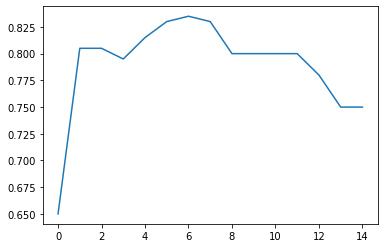

In [12]:
result = []

for i in tqdm(range(15)):
    dt = DecisionTree(max_depth= i, feature_labels=features)
    dt.fit(X_train, y_train)
    result.append(sklearn.metrics.accuracy_score(y_val, dt.predict(X_val)))

plt.plot(result)

Titanic Decision Tree Accuracy

In [13]:
dt = DecisionTree(max_depth= 8, feature_labels=features)
dt.fit(X_train, y_train)
sklearn.metrics.accuracy_score(y_val, dt.predict(X_val))

0.8

Titanic Random Forest Accuracy

In [14]:
rf = RandomForest(features=features, max_depth= 8, n = 200, m = 4)
rf.fit(X_train, y_train)
sklearn.metrics.accuracy_score(y_val, rf.predict(X_val))

Training



Predicting


0.855

In [15]:
titanic_test_preds = rf.predict(Z)
titanic_test_preds

Predicting


array([1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1.

In [16]:
dataset = "spam"
params = {
    "max_depth": 5,
    # "random_state": 6,
    "min_samples_leaf": 10,
}
N = 100
features = [
    "pain", "private", "bank", "money", "drug", "spam", "prescription", "creative",
    "height", "featured", "differ", "width", "other", "energy", "business", "message",
    "volumes", "revision", "path", "meter", "memo", "planning", "pleased", "record", "out",
    "semicolon", "dollar", "sharp", "exclamation", "parenthesis", "square_bracket",
    "ampersand"
]
assert len(features) == 32

# Load spam data
path_train = 'spam_data.mat'
data = scipy.io.loadmat(path_train)
X = data['training_data']
y = np.squeeze(data['training_labels'])
Z = data['test_data']
class_names = ["Ham", "Spam"]
print("Features:", features)
print("Train/test size:", X.shape, Z.shape)

print("\n\nPart 0: constant classifier")
print("Accuracy", 1 - np.sum(y) / y.size)


Features: ['pain', 'private', 'bank', 'money', 'drug', 'spam', 'prescription', 'creative', 'height', 'featured', 'differ', 'width', 'other', 'energy', 'business', 'message', 'volumes', 'revision', 'path', 'meter', 'memo', 'planning', 'pleased', 'record', 'out', 'semicolon', 'dollar', 'sharp', 'exclamation', 'parenthesis', 'square_bracket', 'ampersand']
Train/test size: (5172, 32) (5857, 32)


Part 0: constant classifier
Accuracy 0.7099767981438515


In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


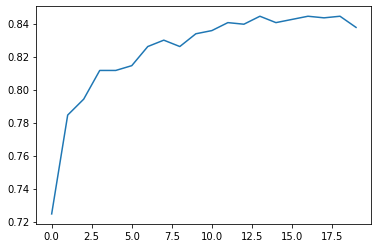

In [18]:
result = []

for i in tqdm(range(20)):
    dt = DecisionTree(max_depth= i, feature_labels=features)
    dt.fit(X_train, y_train)
    result.append(sklearn.metrics.accuracy_score(y_val, dt.predict(X_val)))

plt.plot(result)

Spam Decision Tree Accuracy

In [19]:
dt = DecisionTree(max_depth= 12, feature_labels=features)
dt.fit(X_train, y_train)
sklearn.metrics.accuracy_score(y_val, dt.predict(X_val))

0.8396135265700483

Spam Random Forest Accuracy

In [20]:
rf = RandomForest(features=features, max_depth= 10, n = 200, m = 6)
rf.fit(X_train, y_train)
sklearn.metrics.accuracy_score(y_val, rf.predict(X_val))

Training



Predicting


0.8434782608695652

In [21]:
spam_test_preds = rf.predict(Z)
spam_test_preds

Predicting


array([0., 0., 0., ..., 0., 0., 0.])

## Part 3.5

I decided to go one step further and just print the entire decision tree I fit for spam. This is what it looks like

In [22]:
print_tree(dt)

Pred None. Splitting on exclamation with thresh 1e-05
  Pred None. Splitting on meter with thresh 1e-05
    Pred None. Splitting on parenthesis with thresh 1e-05
      Pred None. Splitting on ampersand with thresh 1e-05
        Pred None. Splitting on volumes with thresh 1e-05
          Final Pred : None
            Pred None. Splitting on semicolon with thresh 1e-05
              Pred None. Splitting on prescription with thresh 1e-05
                Pred None. Splitting on square_bracket with thresh 1e-05
                  Pred None. Splitting on energy with thresh 1.333338888888889
                    Pred None. Splitting on differ with thresh 1e-05
                      Pred None. Splitting on memo with thresh 1e-05
                        Final Pred : 0
                        Final Pred : 0
                      Final Pred : 1
                    Final Pred : 0
                  Pred None. Splitting on message with thresh 1e-05
                    Pred None. Splitting on square_br

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until


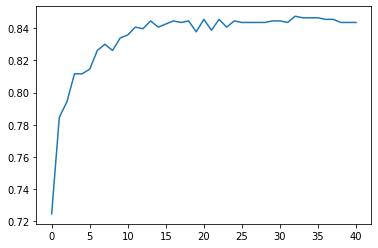

In [23]:
result = []

for i in tqdm(range(41)):
    dt = DecisionTree(max_depth= i, feature_labels=features)
    dt.fit(X_train, y_train)
    result.append(sklearn.metrics.accuracy_score(y_val, dt.predict(X_val)))

plt.plot(result)

## Part 3.6

In [24]:
# Load titanic data
dataset = "titanic"
params = {
    "max_depth": 5,
    # "random_state": 6,
    "min_samples_leaf": 10,
}
N = 100
path_train = 'titanic_training.csv'
data = genfromtxt(path_train, delimiter=',', dtype=None)
path_test = 'titanic_testing_data.csv'
test_data = genfromtxt(path_test, delimiter=',', dtype=None)
y = data[1:, 0]  # label = survived
class_names = ["Died", "Survived"]

labeled_idx = np.where(y != b'')[0]
y = np.array(y[labeled_idx], dtype=np.int)
print("\n\nPart (b): preprocessing the titanic dataset")
X, onehot_features = preprocess(data[1:, 1:], onehot_cols=[1, 5, 7, 8])
X = X[labeled_idx, :]
Z, _ = preprocess(test_data[1:, :], onehot_cols=[1, 5, 7, 8])
assert X.shape[1] == Z.shape[1]
features = list(data[0, 1:]) + onehot_features

print("Features:", features)
print("Train/test size:", X.shape, Z.shape)

print("\n\nPart 0: constant classifier")
print("Accuracy", 1 - np.sum(y) / y.size)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)



Part (b): preprocessing the titanic dataset
Features: [b'pclass', b'sex', b'age', b'sibsp', b'parch', b'ticket', b'fare', b'cabin', b'embarked', b'male', b'female', b'S', b'C', b'Q']
Train/test size: (999, 14) (310, 14)


Part 0: constant classifier
Accuracy 0.6136136136136137


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  # Remove the CWD from sys.path while we load stuff.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  if sys.path[0] == '':


In [25]:
dt = DecisionTree(max_depth= 3, feature_labels=features)
dt.fit(X_train, y_train)
sklearn.metrics.accuracy_score(y_val, dt.predict(X_val))


0.76

In [26]:
print_tree(dt)

Pred None. Splitting on b'male' with thresh 1e-05
  Final Pred : None
    Pred None. Splitting on b'S' with thresh 1e-05
      Final Pred : 1
      Final Pred : 1
    Pred None. Splitting on b'S' with thresh 1e-05
      Final Pred : 1
      Final Pred : 0
  Final Pred : None
    Pred None. Splitting on b'age' with thresh 61.99999444444444
      Final Pred : 0
      Final Pred : 0
    Pred None. Splitting on b'sibsp' with thresh 2.6666700000000003
      Final Pred : 0
      Final Pred : 0


# Submitting To Kaggle

Username: aryanluthra

Display Name: Aryan Luthra


In [29]:
titanic_test_preds

array([1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 1.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1.,
       1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0.,
       0., 1., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 1.

In [30]:
from save_csv import results_to_csv

In [31]:
results_to_csv(titanic_test_preds)

In [34]:
spam_test_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [36]:
np.unique(spam_test_preds, return_counts = True)

(array([0., 1.]), array([4519, 1338], dtype=int64))

In [37]:
results_to_csv(spam_test_preds)